In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from requests import get
from urllib.parse import urlparse

<AxesSubplot:>

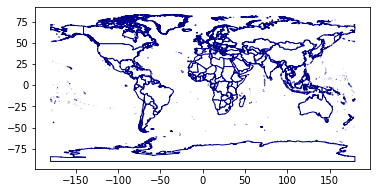

In [3]:
gpkg_src = 'https://bit.ly/2K4JcsB'
world = gpd.read_file(gpkg_src, drive='GPKG')
world.plot(facecolor='white', edgecolor='darkblue')

In [4]:
#world.to_file('world.gpkg', driver='GPKG')
#world.to_file('world.shp', driver='Shapefile')
world.to_file('world.geojson', driver='GeoJSON')

In [4]:
print(isinstance(world, pd.DataFrame))

True


<AxesSubplot:>

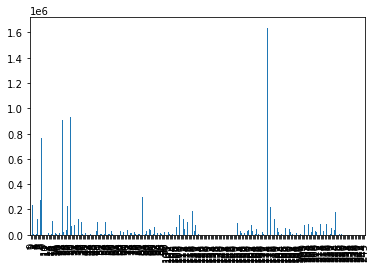

In [5]:
world.AREA.plot.bar()

epsg:4326


<AxesSubplot:>

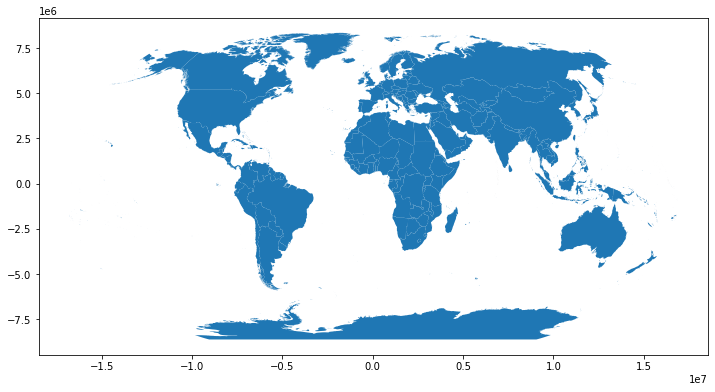

In [6]:
#reprojection
print(world.crs)
world2 = world.to_crs('ESRI:54030')
world2.plot(figsize=(12,8))

<AxesSubplot:>

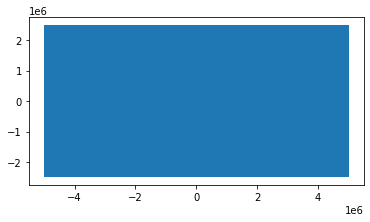

In [8]:
from shapely import wkt

# Notice coordinate pairs and last point is same as first
bbox = 'POLYGON((5000000.0 2500000.0, 5000000.0 -2500000.0, -5000000.0 -2500000.0, -5000000.0 2500000.0, 5000000.0 2500000.0 ))'

# Create GeoPandas from dict just like Pandas
bgdf = gpd.GeoDataFrame({'id':[0], 'coordinates':bbox})

# Turn it into a geometry
bgdf['geometry'] = bgdf.coordinates.apply(wkt.loads)
bgdf = bgdf.set_crs('ESRI:54030')
bgdf.plot()

(-3000000.0, 3000000.0)

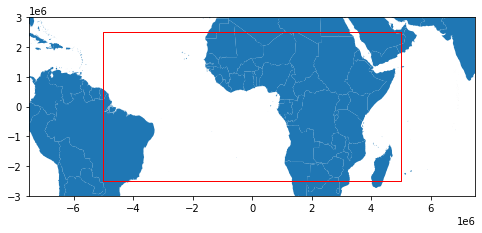

In [9]:

scale = int(float('1e7'))
f,ax=plt.subplots(figsize=(8,4))
world2.plot(ax=ax)
bgdf.plot(ax=ax, color='none', edgecolor='r')
ax.set_xlim([-0.75*scale, +0.75*scale])
ax.set_ylim([-3*scale/10, +3*scale/10])
